In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 12.3 MB/s eta 0:00:00


In [2]:
import torch
import torch.optim as optim
from loss_functions import get_binary_loss
from model import BinaryClassifier
from trainer import evaluate, train_evaluate
from prepare_dataset import get_binary_data
from visualize_results import validation_loss, validation_accuracy, validation_accuracy_heatmap, get_robust_outlier, get_noisy_robust_outlier, validation_loss_robust, validation_accuracy_outlier

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_functions = get_binary_loss()
train_loader, validation_loader, test_loader, noisy_test_loaders = get_binary_data()
results = {}

for loss_name, loss_function in loss_functions.items():
    print(f"Training with {loss_name}...")
    model = BinaryClassifier().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses, metrics = train_evaluate(
        model, train_loader, validation_loader, loss_function, optimizer, device=device, epochs=30
    )

    results[loss_name] = {"model_state_dict": model.state_dict(), "train_losses": train_losses, "val_losses": val_losses, "metrics": metrics}

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 305kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.64MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.25MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Training with Binary Cross-Entropy Loss...
Epoch [10/30] | Train Loss: 121.7327 | Val Loss: 120.1132 | Accuracy: 0.9910
Epoch [20/30] | Train Loss: 121.7413 | Val Loss: 120.0985 | Accuracy: 0.9919
Epoch [30/30] | Train Loss: 121.7487 | Val Loss: 120.1423 | Accuracy: 0.9900
Training with Hinge Loss...
Epoch [10/30] | Train Loss: 0.4968 | Val Loss: 0.5014 | Accuracy: 0.5014
Epoch [20/30] | Train Loss: 0.4968 | Val Loss: 0.5014 | Accuracy: 0.5014
Epoch [30/30] | Train Loss: 0.4968 | Val Loss: 0.5013 | Accuracy: 0.5014
Training with Focal Loss...
Epoch [10/30] | Train Loss: 36.5184 | Val Loss: 36.0483 | Accuracy: 0.9914
Epoch [20/30] | Train Loss: 36.5034 | Val Loss: 36.0171 | Accuracy: 0.9929
Epoch [30/30] | Train Loss: 36.5018 | Val Loss: 36.0133 | Accuracy: 0.9938


# Validation The Loss

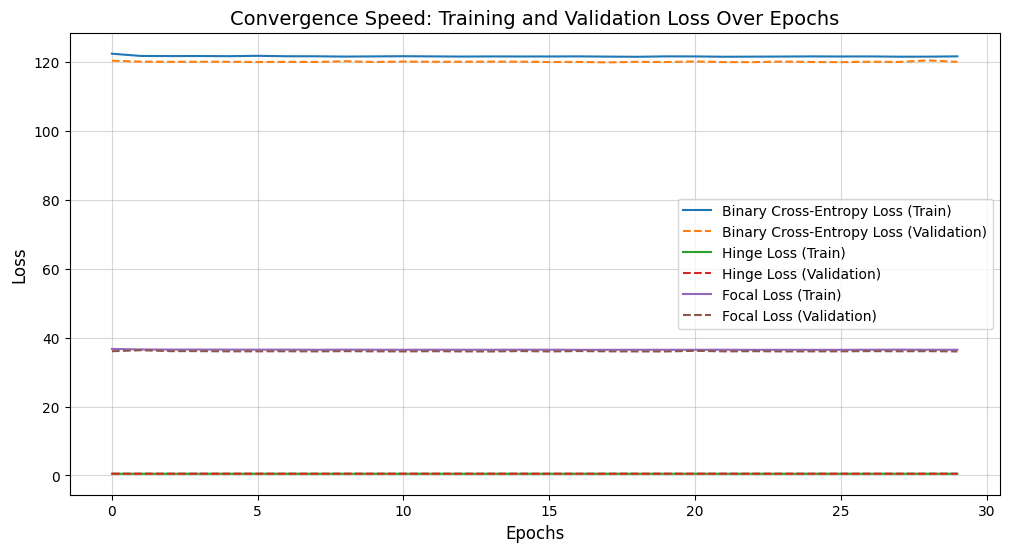

In [4]:
validation_loss(results=results)

# Validation The Accuracy

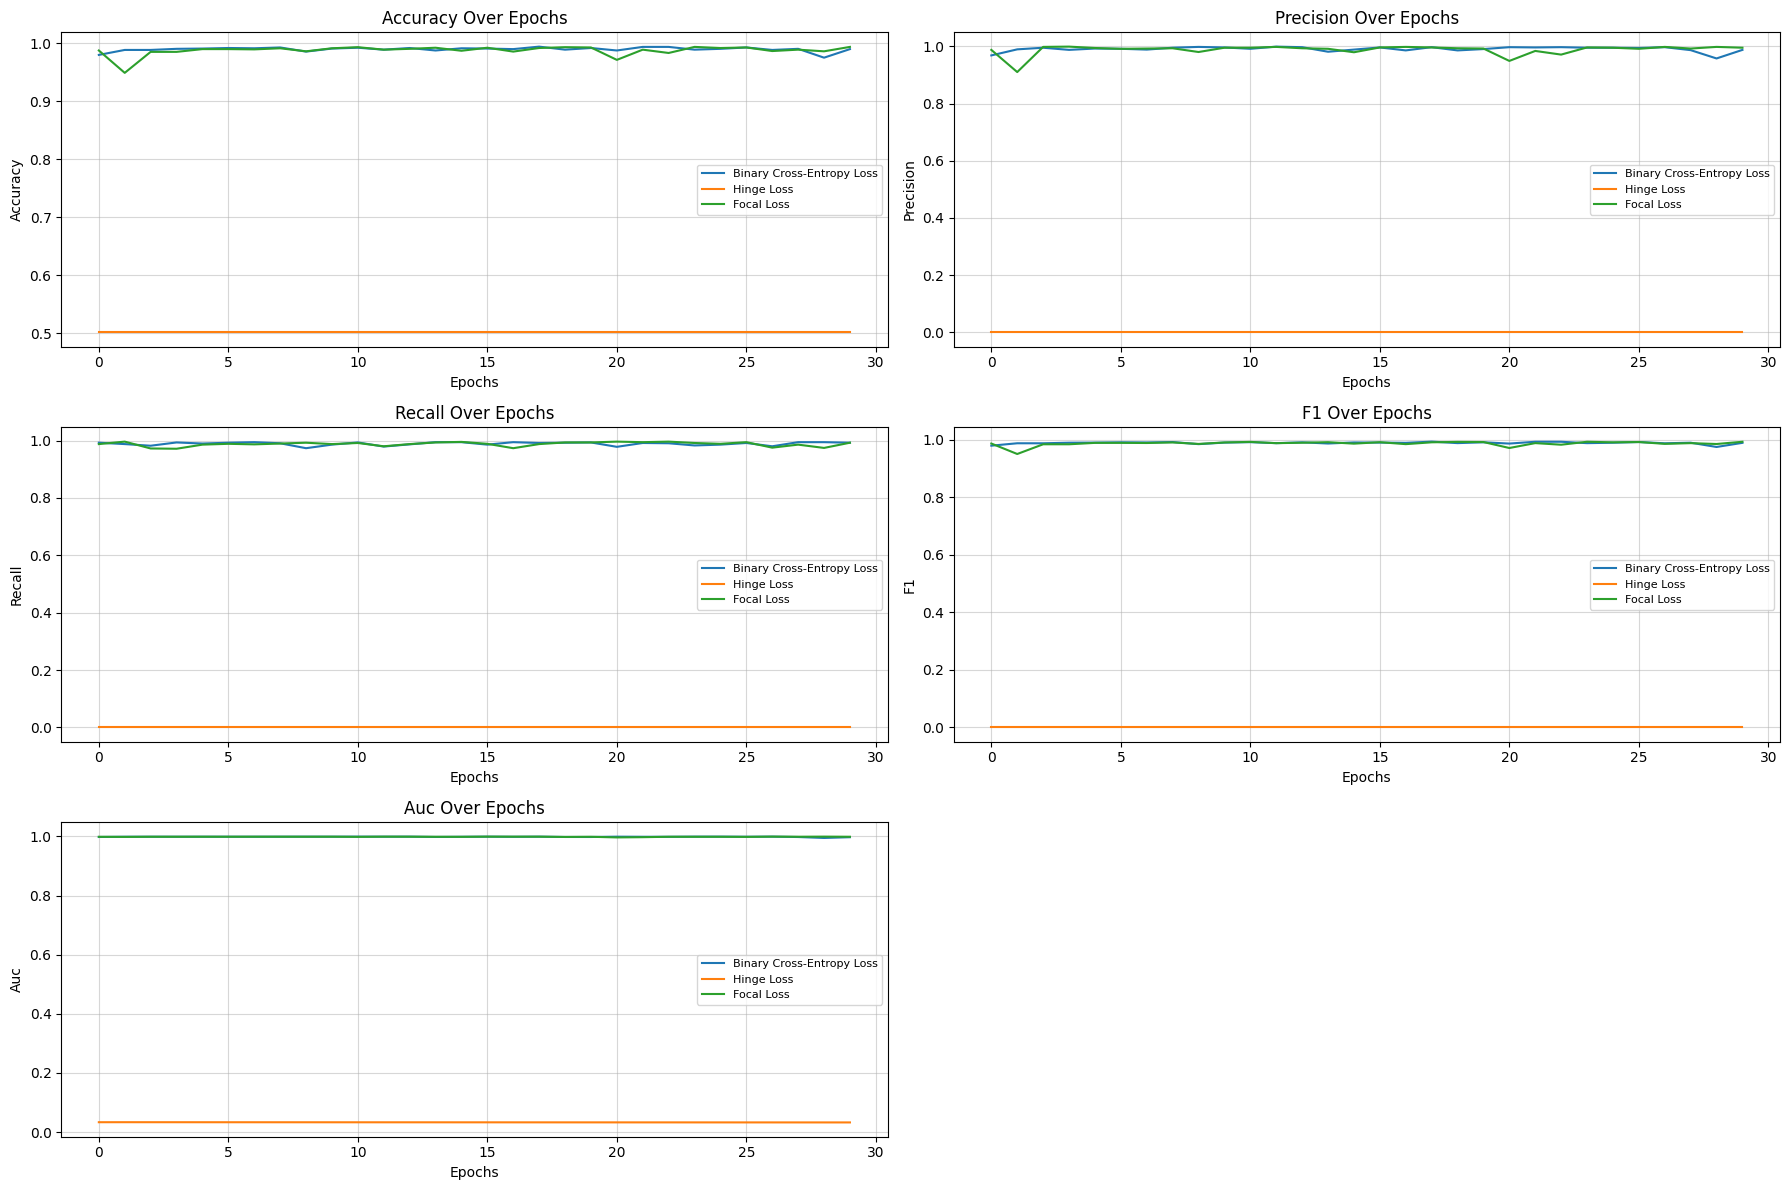

In [5]:
validation_accuracy(results=results)

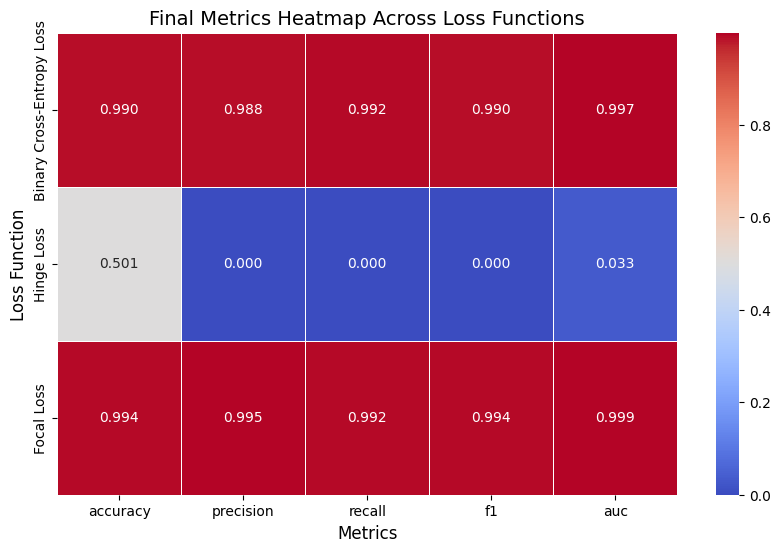

In [6]:
validation_accuracy_heatmap(metrics=metrics, results=results)

# Validation The Loss And The Accuracy on Test Dataset

In [7]:
robust_df, outlier_df = get_robust_outlier(test_loader=test_loader, results=results, loss_functions=loss_functions, device=device)

<Figure size 1400x700 with 0 Axes>

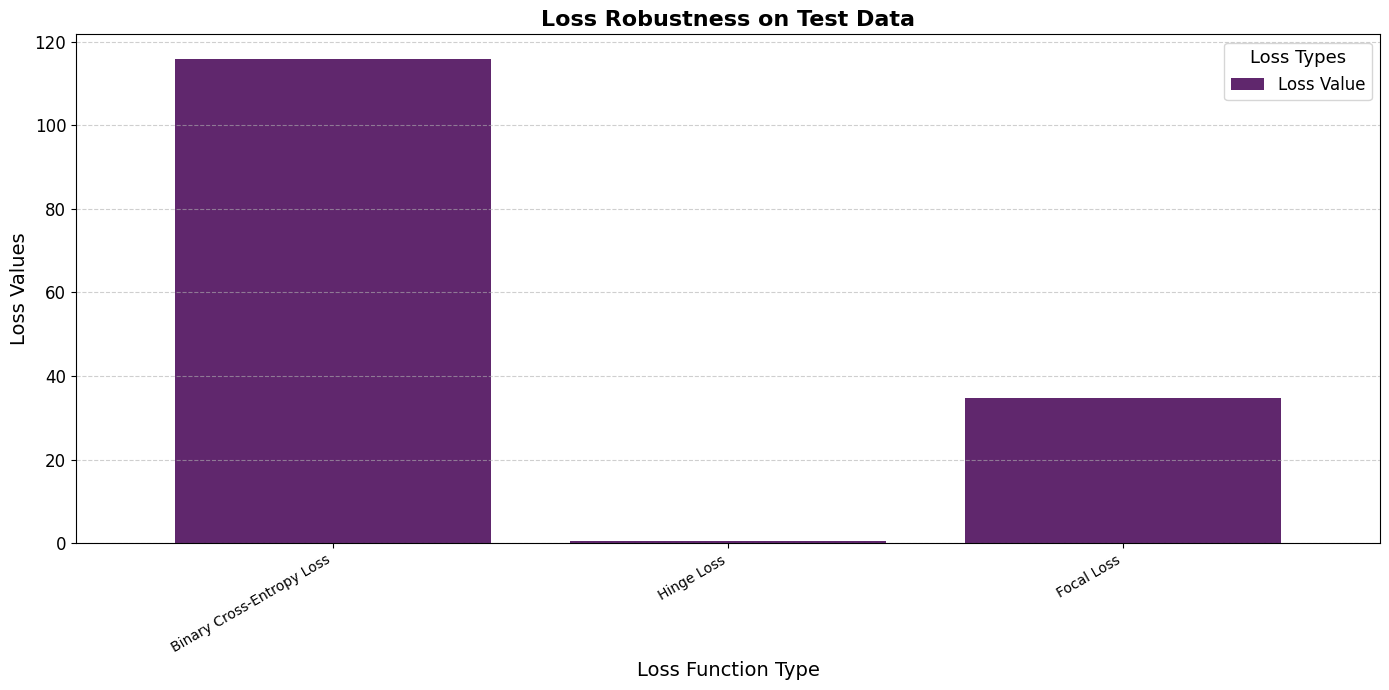

In [8]:
validation_loss_robust(robust_df)

<Figure size 1400x700 with 0 Axes>

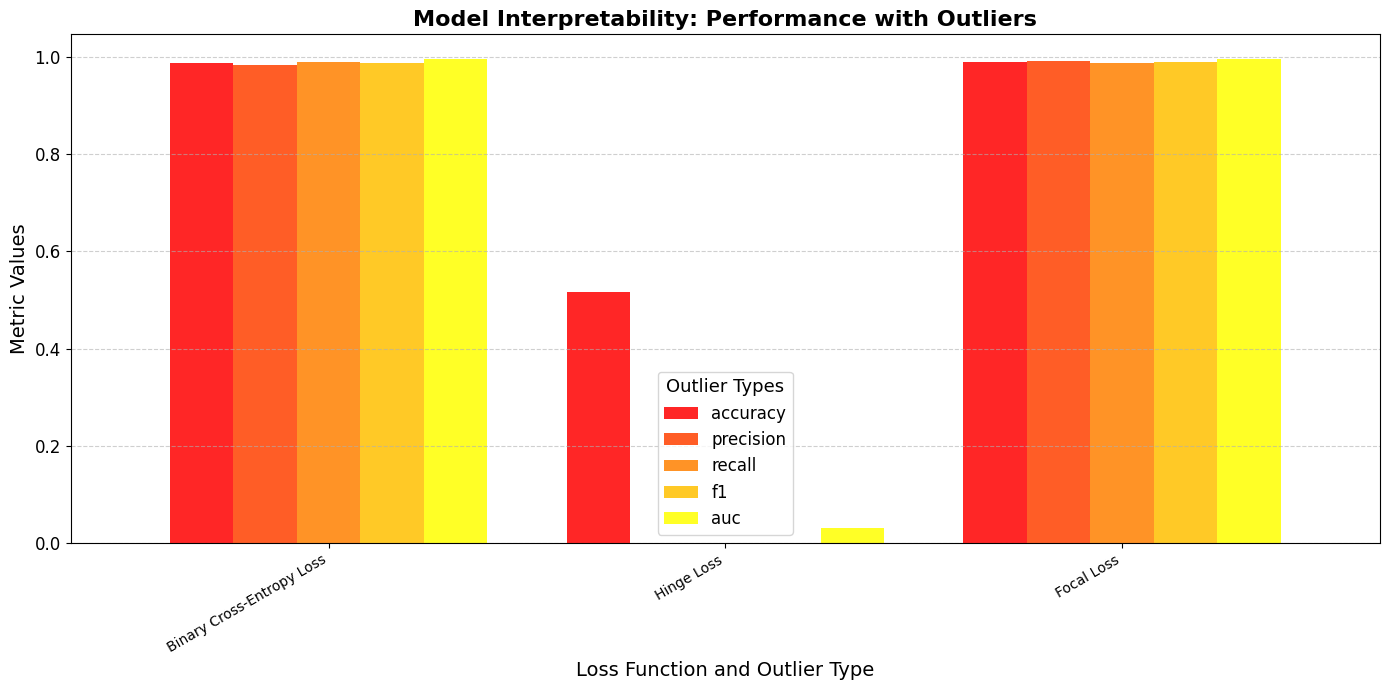

In [9]:
validation_accuracy_outlier(outlier_df)

# Validation The Loss And The Accuracy on Noisy Test Dataset

In [10]:
robust_df, outlier_df = get_noisy_robust_outlier(noisy_test_loaders=noisy_test_loaders, results=results, loss_functions=loss_functions, device=device)

<Figure size 1400x700 with 0 Axes>

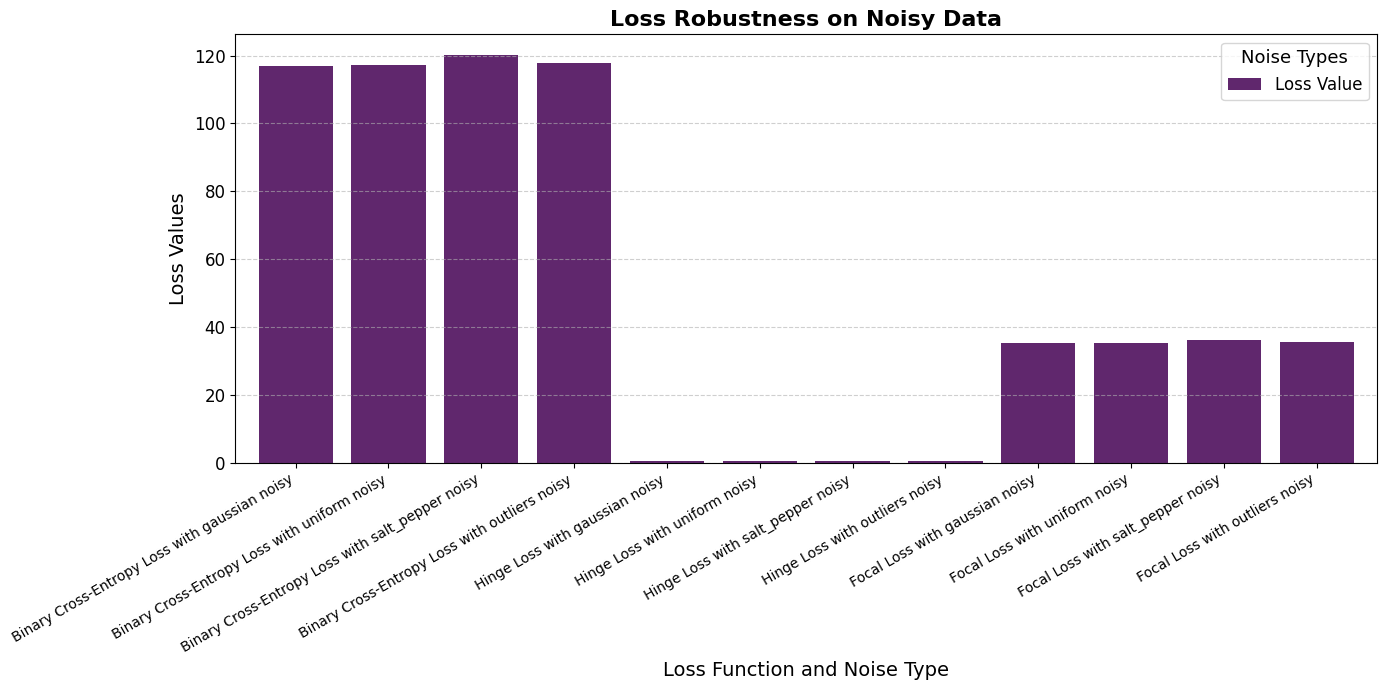

In [11]:
validation_loss_robust(robust_df, noise="noise")

<Figure size 1400x700 with 0 Axes>

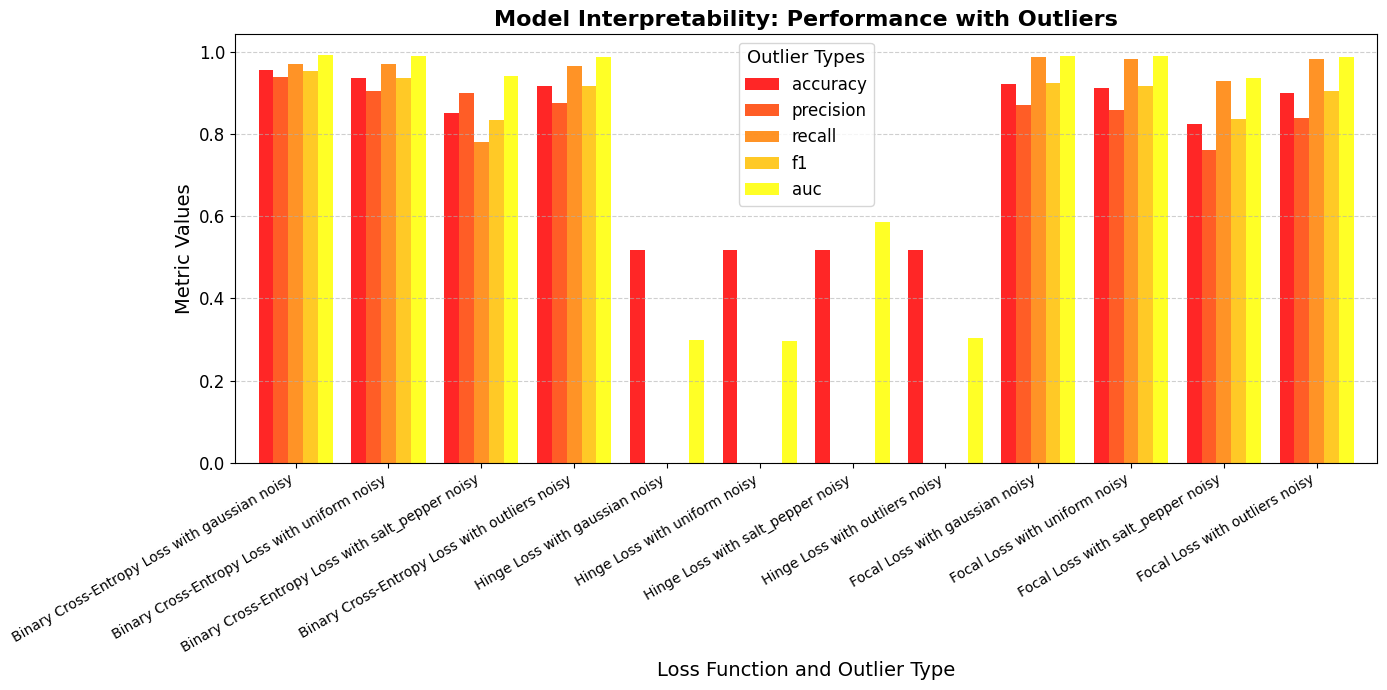

In [12]:
validation_accuracy_outlier(outlier_df)